In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew,norm
from pandas.io.json import json_normalize
import numpy as np
from FUNCIONES_TASAS import *
import pandas as pd

In [2]:
@staticmethod
def calcular_tasa_colocar(precio_plazo_cercano: float, precio_plazo_lejano: float, derecho_mercado: float, diferencia_dias_liquidacion: float,):
    return ((precio_plazo_lejano / precio_plazo_cercano) * ((1.0 - derecho_mercado) / (1.0 + derecho_mercado)) - 1.0) * (365.0 / diferencia_dias_liquidacion)

@staticmethod
def calcular_tasa_tomar(
    precio_plazo_cercano: float, 
    precio_plazo_lejano: float, 
    derecho_mercado: float, 
    diferencia_dias_liquidacion: float,
    ) -> float:
        """formula definida en la servilleta"""

        return ((precio_plazo_lejano / precio_plazo_cercano) * ((1.0 + derecho_mercado)/ (1.0 - derecho_mercado)) - 1.0) * (365.0 / diferencia_dias_liquidacion)

In [3]:
df=pd.read_csv("/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/PROYECTO_TRADING/BASES_DE_DATOS/DATOS_CSV/AL30_COMPLETE_TASAS.csv")

# ANALISIS DIFERENCIA ENTRE COLOCAR Y TOMAR 

In [4]:
datos=df[["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]]

In [5]:
datos

,COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA,TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA,TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA,COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA
0,0.340921,0.408068,0.389028,0.368681
1,0.340921,0.408068,0.389028,0.368681
2,0.265913,0.286238,0.379653,0.312460
3,0.275286,0.295612,0.379653,0.312460
4,0.275286,0.295612,0.379653,0.312460
...,...,...,...,...
5605,0.365928,0.381257,0.385699,0.070656
5606,0.365928,0.381257,0.385699,0.070656
5607,0.365928,0.381257,0.385699,0.070656
5608,0.365928,0.381257,0.385699,0.070656


In [183]:
datos_colocar_tomar=datos[["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]]
datos_tomar_colocar=datos[["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]]

**CORRELACION COLOCAR T0 TOMAR T+2**

<Axes: >

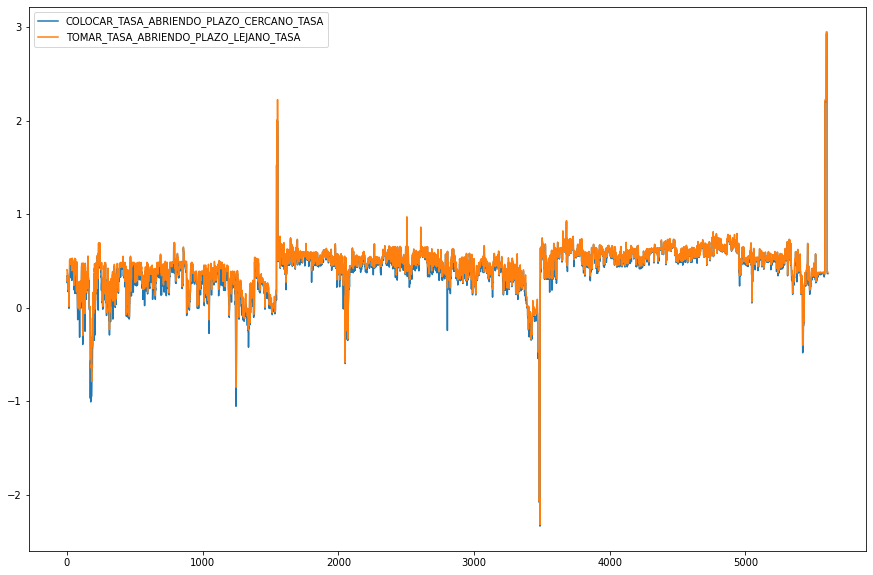

In [184]:
datos[["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]].plot(figsize=(15,10))

**SPREAD**

In [185]:
datos_colocar_tomar["SPREAD_colocar_tomar"]=datos_colocar_tomar["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-datos_colocar_tomar["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]

/var/folders/nj/vt_f4yq17yx2llk4g9ysrl280000gn/T/ipykernel_80240/2596658964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_colocar_tomar["SPREAD_colocar_tomar"]=datos_colocar_tomar["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-datos_colocar_tomar["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]


**PORQUE NO HAY SPREAD POSITIVO??**

<Axes: >

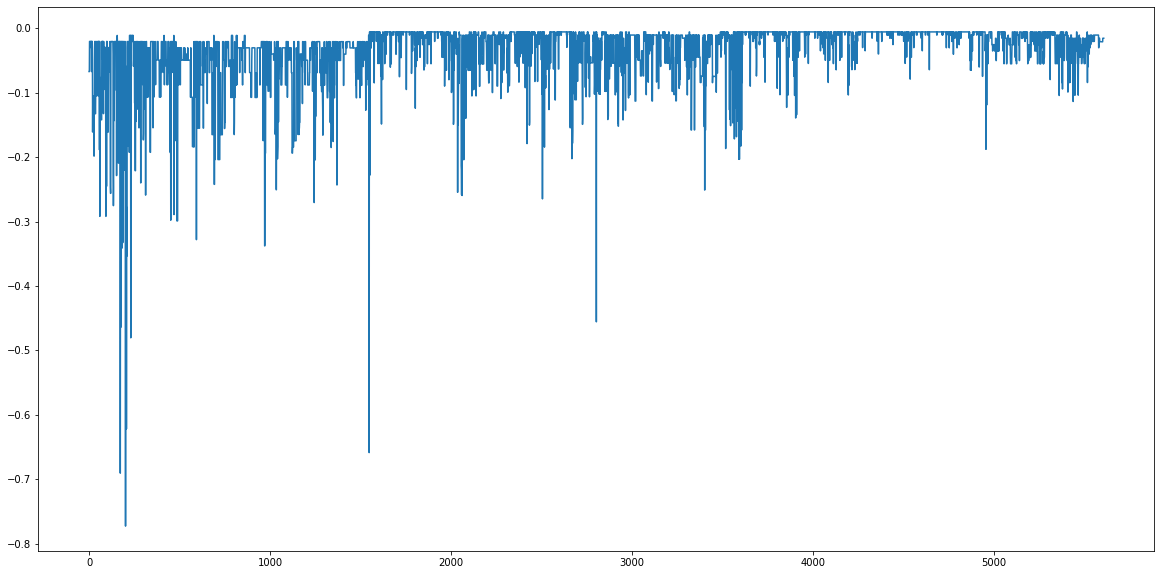

In [186]:
datos_colocar_tomar["SPREAD_colocar_tomar"].plot(figsize=(20,10))

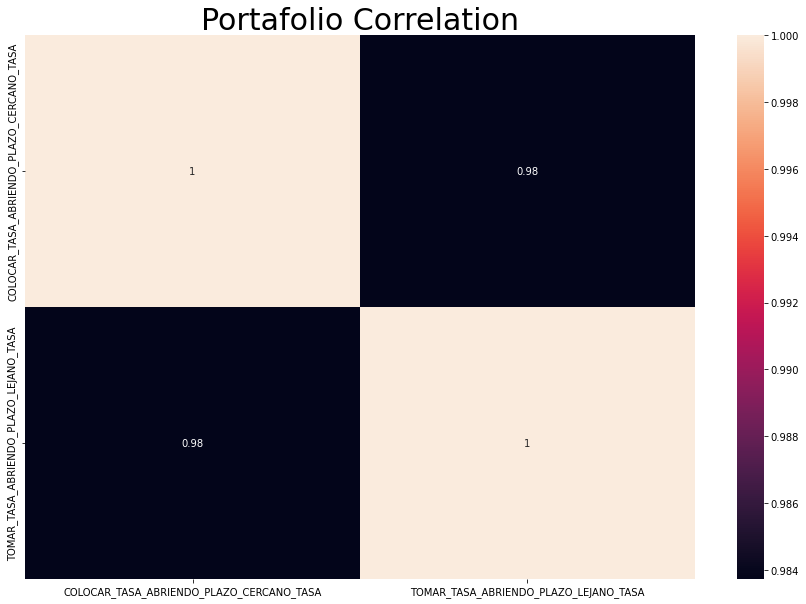

In [187]:
DATOS_1_PLOT=datos_colocar_tomar[["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]]
correlation_mat=DATOS_1_PLOT.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_mat, annot=True)
plt.title("Portafolio Correlation", fontsize=30)
plt.show()

In [188]:
DATOS_1_PLOT["SPREAD"]=DATOS_1_PLOT["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-DATOS_1_PLOT["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]

<Axes: >

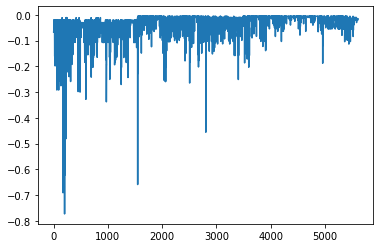

In [189]:
DATOS_1_PLOT["SPREAD"].plot()

**SUPONGAMOS QUE HAY UNA ORDEN DE COLOCAR Y TOMAR CON BASE EN LOS SPREADS, QUE NOS CONVENDRIA, QUE LAS VARIABLES ESTEN FUERTEMENTE CORRELACIONADAS O NO LO ESTEN? SI LA CORRELACION ES ALTA PUEDE QUE HAYA MAS SPREAD O MENOR SPREAD?**

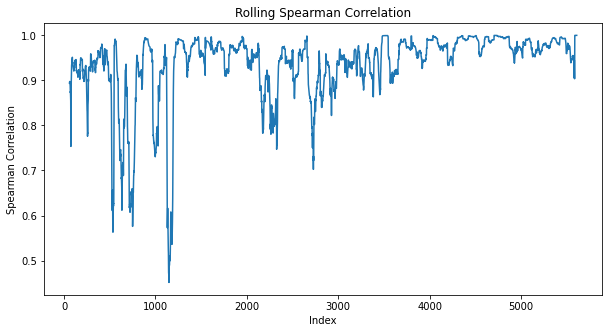

In [190]:
import pandas as pd
import matplotlib.pyplot as plt

col1 = "COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"
col2 = "TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"
ROLLING_FACTOR = 60
rolling_corr_COLOCAR_TOMAR = datos_colocar_tomar[col1].rolling(ROLLING_FACTOR).corr(datos_colocar_tomar[col2])


rolling_corr_COLOCAR_TOMAR.plot(figsize=(10, 5))
plt.xlabel('Index')
plt.ylabel('Spearman Correlation')
plt.title('Rolling Spearman Correlation')
plt.show()

In [191]:
print(np.var(rolling_corr_COLOCAR_TOMAR))
print(np.mean(rolling_corr_COLOCAR_TOMAR))

0.006120461343265207
0.9358403323957581


#  TOMAR T0 COLOCAR T+2

**SPREAD**

In [192]:
datos_colocar_tomar["SPREAD_colocar_tomar"].mean()

-0.03439340091969295

In [193]:
datos_tomar_colocar["SPREAD_tomar_colocar"]=datos_tomar_colocar["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-datos_tomar_colocar["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]

/var/folders/nj/vt_f4yq17yx2llk4g9ysrl280000gn/T/ipykernel_80240/4178131562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_tomar_colocar["SPREAD_tomar_colocar"]=datos_tomar_colocar["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-datos_tomar_colocar["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]


In [194]:
datos_tomar_colocar["SPREAD_tomar_colocar"]

0       0.020347
1       0.020347
2       0.067194
3       0.067194
4       0.067194
          ...   
5605    0.315043
5606    0.315043
5607    0.315043
5608    0.315043
5609    0.315043
Name: SPREAD_tomar_colocar, Length: 5610, dtype: float64

<Axes: >

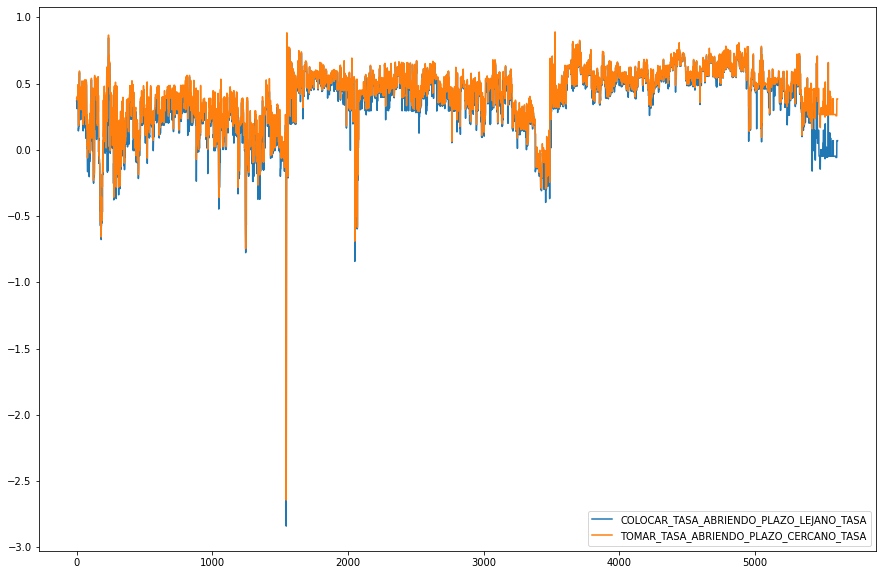

In [195]:
datos[["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]].plot(figsize=(15,10))

**POORQUE EL SPREAD ES POSITIVO**

<Axes: >

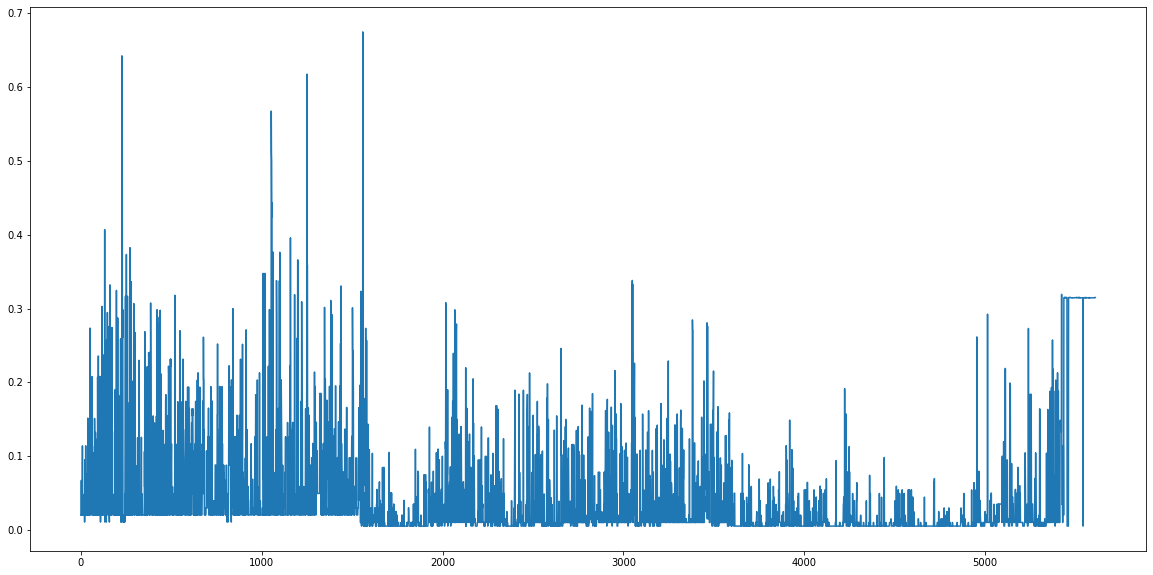

In [196]:
datos_tomar_colocar["SPREAD_tomar_colocar"].plot(figsize=(20,10))

**CORRELACION TOMAR T0 COLOCAR T+2**

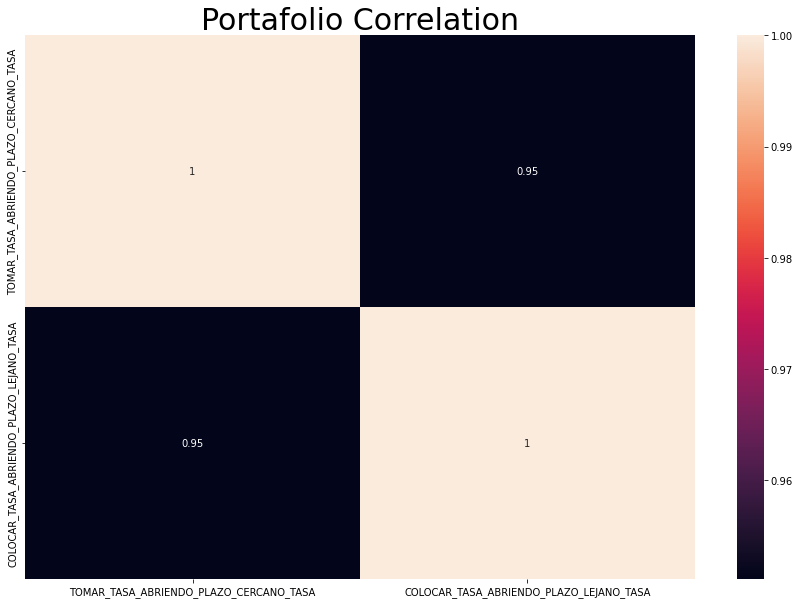

In [197]:
DATOS_2_PLOT=datos_tomar_colocar[["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]]
correlation_mat=DATOS_2_PLOT.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_mat, annot=True)
plt.title("Portafolio Correlation", fontsize=30)
plt.show()

In [198]:
DATOS_2_PLOT

,TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA,COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA
0,0.389028,0.368681
1,0.389028,0.368681
2,0.379653,0.312460
3,0.379653,0.312460
4,0.379653,0.312460
...,...,...
5605,0.385699,0.070656
5606,0.385699,0.070656
5607,0.385699,0.070656
5608,0.385699,0.070656


**NOTEMOS QUE LA VARIABLE DE TOMAR 0 Y COLOCAR T+2 ES MAS ESTABLE EN LA VARIANZA Y LA MEDIA MAS ALTA, ESTO QUE SIGNIFICA? MISMA PREGUNTA QUE LA ANTERIOR**

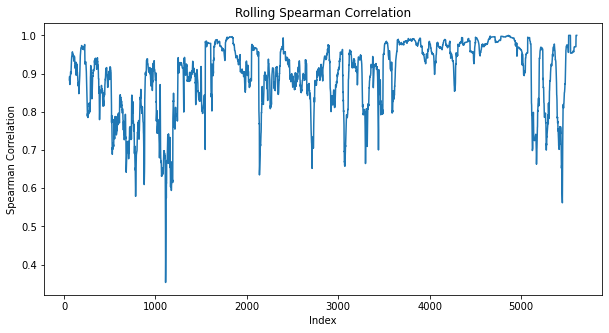

In [199]:
import pandas as pd
import matplotlib.pyplot as plt

col1 = "TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"
col2 = "COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"
ROLLING_FACTOR = 60
rolling_corr_TOMAR_COLOCAR = datos_tomar_colocar[col1].rolling(ROLLING_FACTOR).corr(datos_tomar_colocar[col2])


rolling_corr_TOMAR_COLOCAR.plot(figsize=(10, 5))
plt.xlabel('Index')
plt.ylabel('Spearman Correlation')
plt.title('Rolling Spearman Correlation')
plt.show()

In [200]:
print("Correlacion entre Tomar0 y Colocar+2")
print("Media de correlaciones: ",np.mean(rolling_corr_TOMAR_COLOCAR))
print("Varianza de correlaciones: ",np.var(rolling_corr_TOMAR_COLOCAR))
print(" ")
print("Correlacion entre Colocar0 y Tomar+2")
print("Media de correlaciones: ",np.mean(rolling_corr_COLOCAR_TOMAR))
print("Varianza de correlaciones: ",np.var(rolling_corr_COLOCAR_TOMAR))

Correlacion entre Tomar0 y Colocar+2
Media de correlaciones:  0.8968417437411312
Varianza de correlaciones:  0.00819715066382794
 
Correlacion entre Colocar0 y Tomar+2
Media de correlaciones:  0.9358403323957581
Varianza de correlaciones:  0.006120461343265207


# ANALISIS SPREADS COLOCAR T0 COLOCAR T+2 Y TOMAR T0 TOMAR +2

**PREGUNTA. QUE PASA SI EXISTE UNA SEÑAL, Y EN ESTE MOMENTO LOS SPREADS ENTRE COLOCAR ACTUAL Y T+2 Y EL SPREAD ENTRE TOMAR 0 Y TOMAR +2, DEBERIA DE HABER MAS ESPACIO PARA TRIGGER?? SI EL SPREAD ENTRE AMBAS ES CORTO, PODRIA SIGNIFICAR MENIOR ESPACIO PARA TRIGGER**

In [201]:
datos_TOMAR=datos[["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]]

In [202]:
datos_TOMAR["SPREAD"]=datos_TOMAR["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]-datos_TOMAR["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]

/var/folders/nj/vt_f4yq17yx2llk4g9ysrl280000gn/T/ipykernel_80240/3714019025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_TOMAR["SPREAD"]=datos_TOMAR["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]-datos_TOMAR["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]


<Axes: >

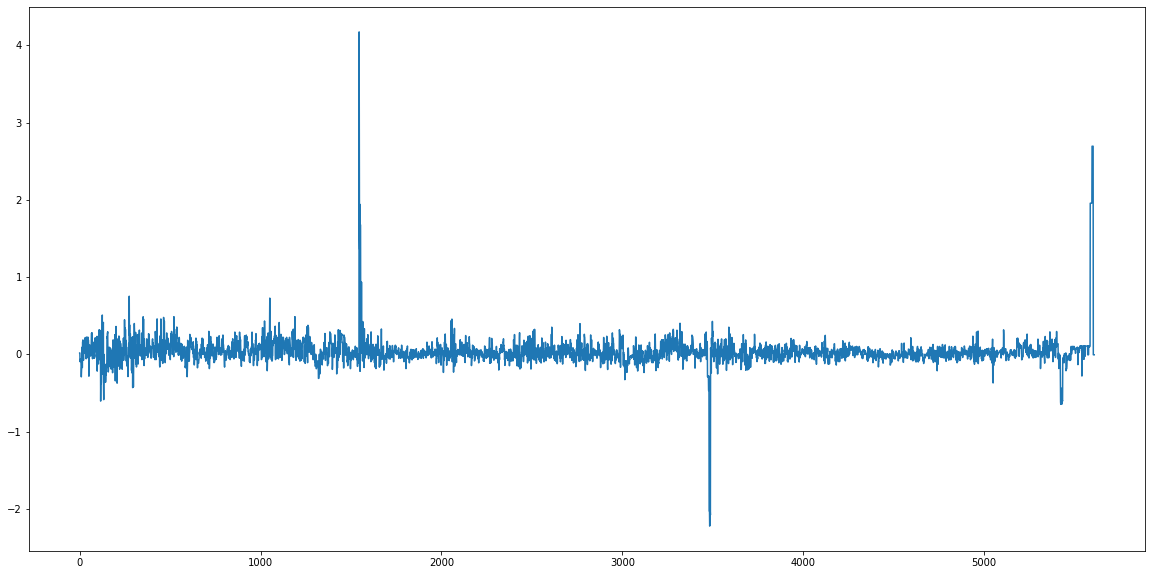

In [203]:
datos_TOMAR["SPREAD"].plot(figsize=(20,10))

In [204]:
datos_COLOCAR=datos[["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]]

In [205]:
datos_COLOCAR["SPREAD"]= datos_COLOCAR["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-datos_COLOCAR["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]

/var/folders/nj/vt_f4yq17yx2llk4g9ysrl280000gn/T/ipykernel_80240/3234555845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_COLOCAR["SPREAD"]= datos_COLOCAR["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-datos_COLOCAR["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]


<Axes: >

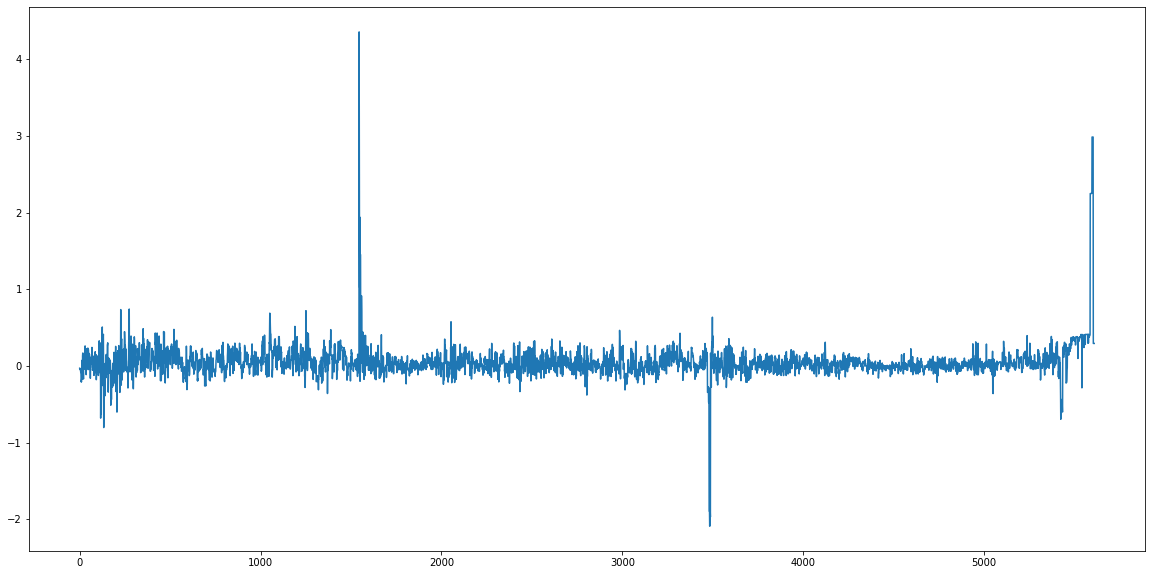

In [206]:
datos_COLOCAR["SPREAD"].plot(figsize=(20,10))

# ANALISIS CORRELACION  COLOCAR T0 COLOCART+2 Y TOMAR 0 TOMAR T+2

**TOMAR 0 TOMAR +2**

In [207]:
datos_TOMAR=datos[["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]]

In [208]:
datos_TOMAR["spread"]=datos_TOMAR["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]-datos_TOMAR["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]

/var/folders/nj/vt_f4yq17yx2llk4g9ysrl280000gn/T/ipykernel_80240/2553772638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_TOMAR["spread"]=datos_TOMAR["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]-datos_TOMAR["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]


<Axes: >

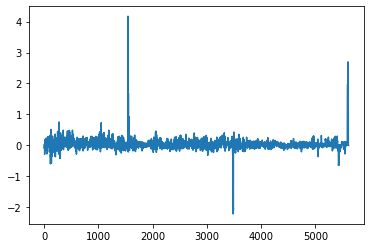

In [209]:
datos_TOMAR["spread"].plot()

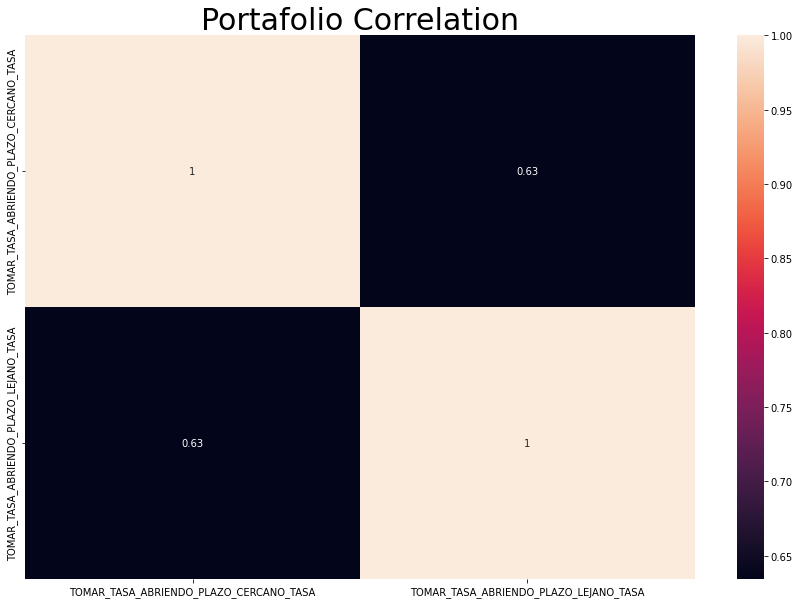

In [210]:
datos_TOMAR=datos[["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]]
correlation_mat = datos_TOMAR.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_mat, annot=True)
plt.title("Portafolio Correlation", fontsize=30)
plt.show()

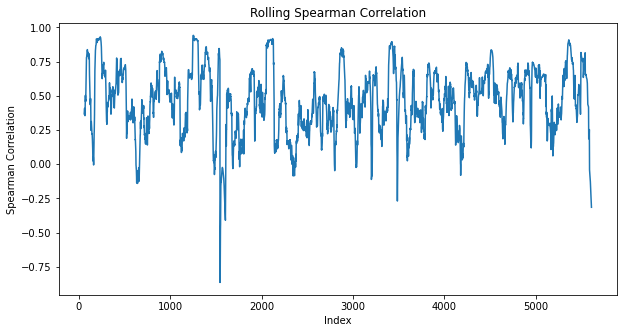

In [211]:
import pandas as pd
import matplotlib.pyplot as plt

col1 = "TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"
col2 = "TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"
ROLLING_FACTOR = 60
rolling_corr_TOMAR_COLOCAR = datos_TOMAR[col1].rolling(ROLLING_FACTOR).corr(datos_TOMAR[col2])


rolling_corr_TOMAR_COLOCAR.plot(figsize=(10, 5))
plt.xlabel('Index')
plt.ylabel('Spearman Correlation')
plt.title('Rolling Spearman Correlation')
plt.show()

****COLOCAR 0 COLOCAR +2****

In [212]:
datos_COLOCAR=datos[["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]]

<Axes: >

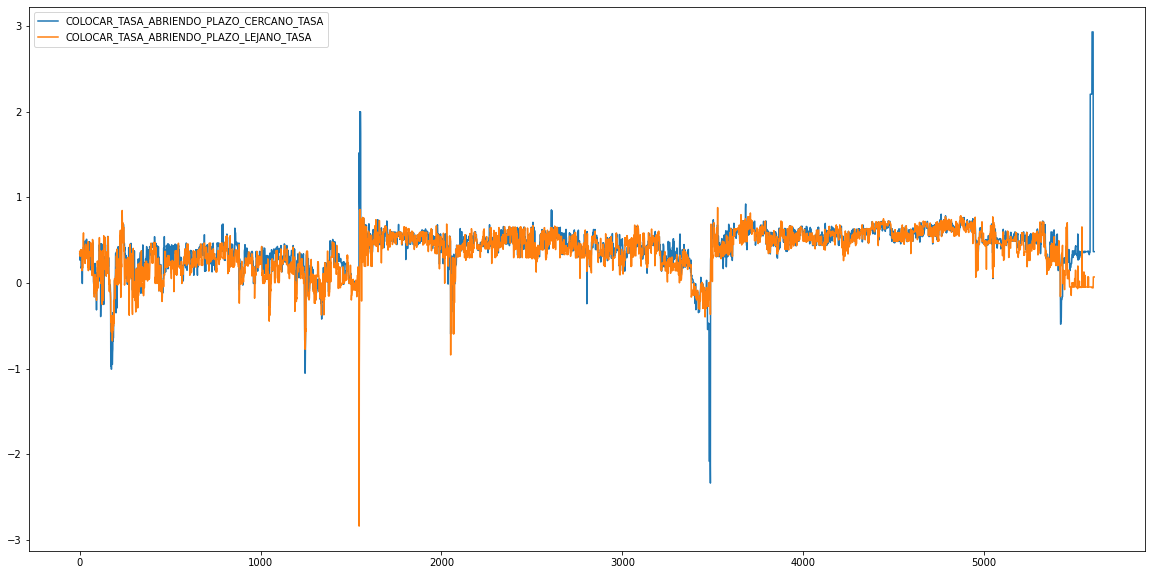

In [213]:
datos_COLOCAR.plot(figsize=(20,10))

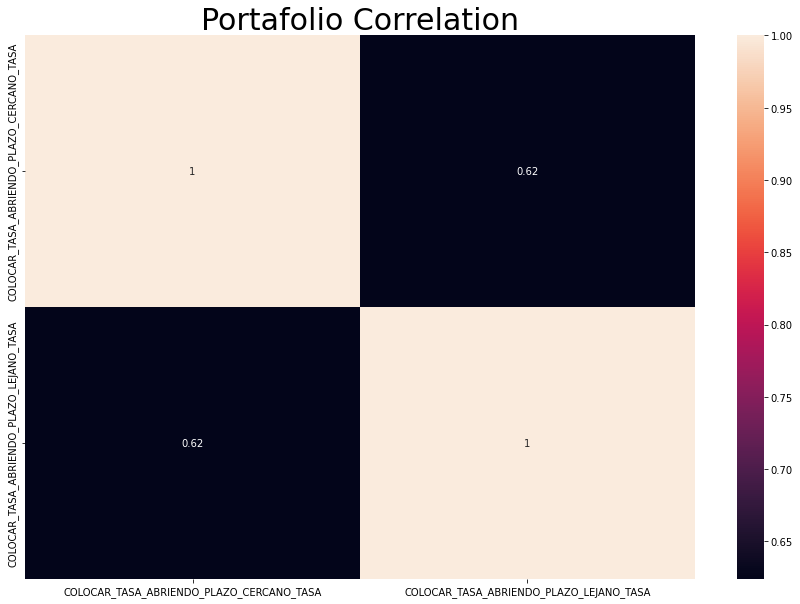

In [214]:
correlation_mat = datos_COLOCAR.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_mat, annot=True)
plt.title("Portafolio Correlation", fontsize=30)
plt.show()

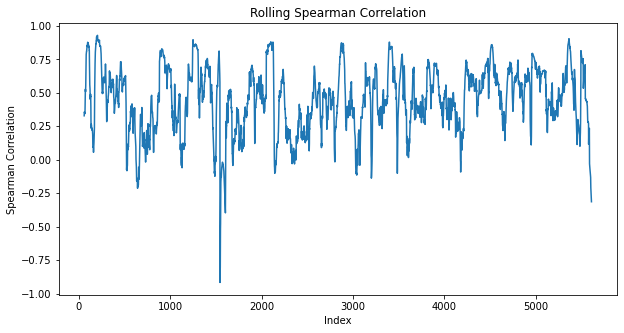

In [215]:
import pandas as pd
import matplotlib.pyplot as plt

col1 = "COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"
col2 = "COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"
ROLLING_FACTOR = 60
rolling_corr_TOMAR_COLOCAR = datos_COLOCAR[col1].rolling(ROLLING_FACTOR).corr(datos_COLOCAR[col2])


rolling_corr_TOMAR_COLOCAR.plot(figsize=(10, 5))
plt.xlabel('Index')
plt.ylabel('Spearman Correlation')
plt.title('Rolling Spearman Correlation')
plt.show()

# ANALISIS DE SPREADS CON TASAS

In [216]:
dato_muestra["SPREAD_COLOCAR"]=dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-(dato_muestra["caucion_a_un_dia_ultimo_trade_tasa"]/100)
dato_muestra["SPREAD_TOMAR"]=(dato_muestra["caucion_a_un_dia_ultimo_trade_tasa"]/100)-dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]

**CENTRAR DATOS**

In [217]:
dato_muestra["SPREAD_CENTRADO_TOMAR"]=dato_muestra["SPREAD_TOMAR"]-dato_muestra["SPREAD_TOMAR"].mean()

**SPREAD_TOMAR_CENTRO**

<Axes: >

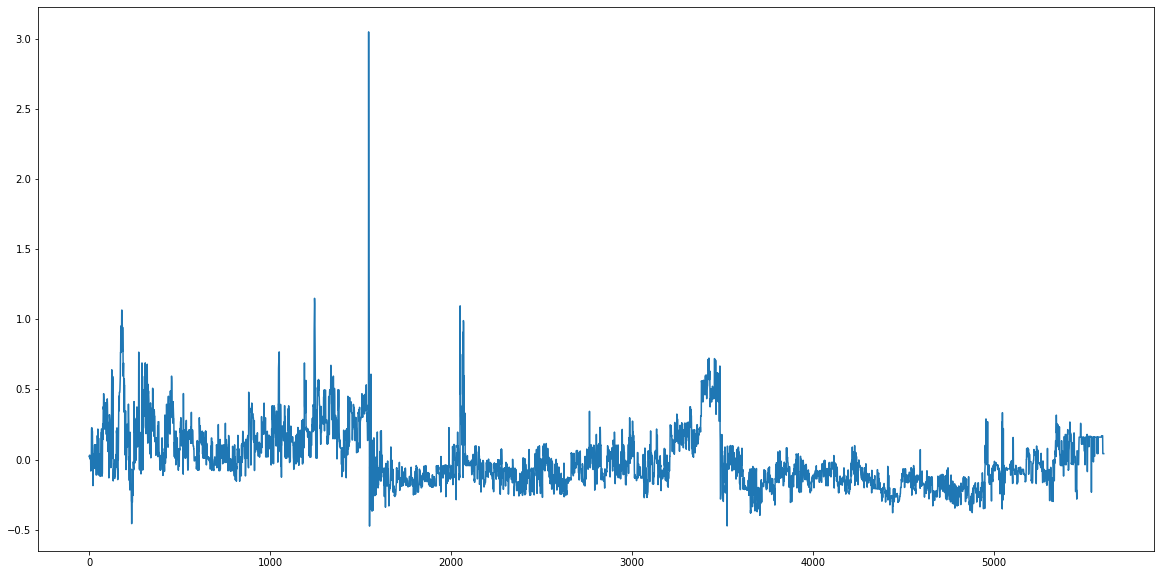

In [218]:
dato_muestra["SPREAD_CENTRADO_TOMAR"].plot(figsize=(20,10))

**SPREAD COLOCAR CENTRO**

In [219]:
dato_muestra["SPREAD_CENTRADO_COLOCAR"]=dato_muestra["SPREAD_COLOCAR"]-dato_muestra["SPREAD_COLOCAR"].mean()

<Axes: >

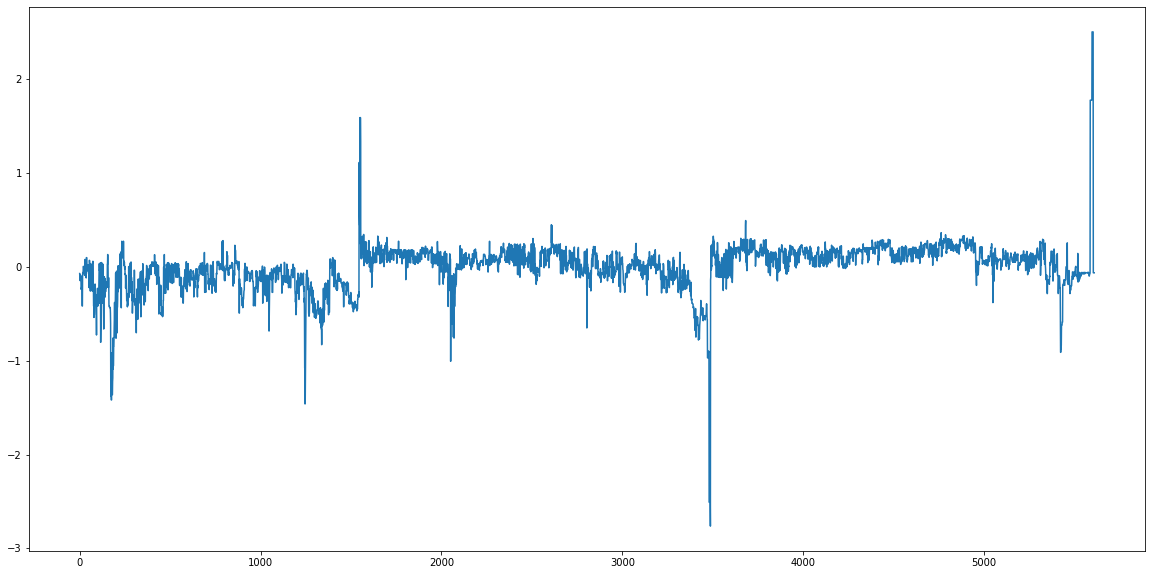

In [220]:
dato_muestra["SPREAD_CENTRADO_COLOCAR"].plot(figsize=(20,10))

In [221]:
df_centrado=dato_muestra[["SPREAD_CENTRADO_COLOCAR","SPREAD_CENTRADO_TOMAR"]]

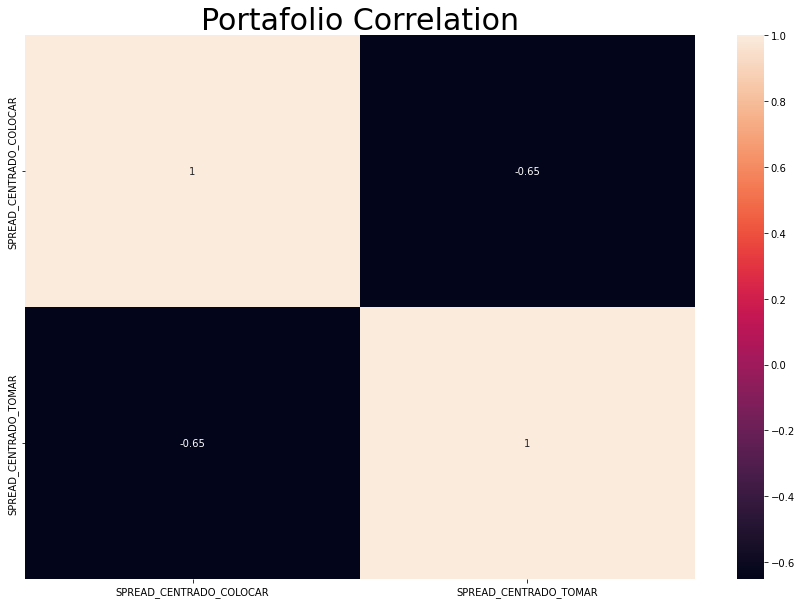

In [222]:
correlation_mat = df_centrado.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_mat, annot=True)
plt.title("Portafolio Correlation", fontsize=30)
plt.show()

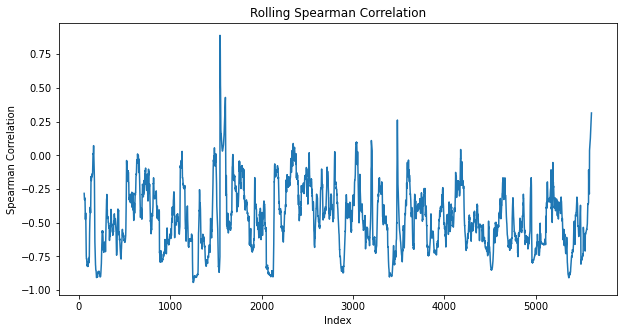

In [223]:
import pandas as pd
import matplotlib.pyplot as plt

col1 = "SPREAD_CENTRADO_COLOCAR"
col2 = "SPREAD_CENTRADO_TOMAR"
ROLLING_FACTOR = 60
rolling_corr_COLOCAR_TOMAR = df_centrado[col1].rolling(ROLLING_FACTOR).corr(df_centrado[col2])


rolling_corr_COLOCAR_TOMAR.plot(figsize=(10, 5))
plt.xlabel('Index')
plt.ylabel('Spearman Correlation')
plt.title('Rolling Spearman Correlation')
plt.show()

# SPREAD DEL SPREAD??

In [224]:
df_centrado["SPREAD_DEL_SPREAD"]=df_centrado["SPREAD_CENTRADO_COLOCAR"]-df_centrado["SPREAD_CENTRADO_TOMAR"]

/var/folders/nj/vt_f4yq17yx2llk4g9ysrl280000gn/T/ipykernel_80240/3026973147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_centrado["SPREAD_DEL_SPREAD"]=df_centrado["SPREAD_CENTRADO_COLOCAR"]-df_centrado["SPREAD_CENTRADO_TOMAR"]


<Axes: >

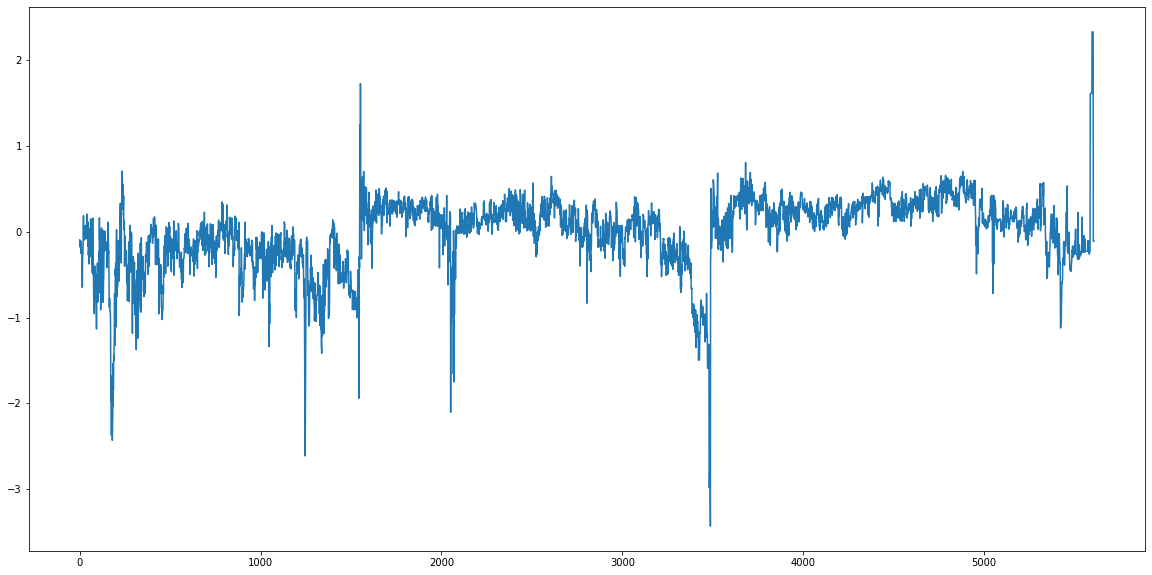

In [225]:
df_centrado["SPREAD_DEL_SPREAD"].plot(figsize=(20,10))